(32561, 123) (32561, 1)
(16281, 123) (16281, 1)
NAG_loss = 0.998961
RMSProp_loss = 0.988379
AdaDelta_loss = 0.996714
Adam_loss = 0.996324
--------------------------------
NAG_loss = 0.997451
RMSProp_loss = 0.979957
AdaDelta_loss = 0.993355
Adam_loss = 0.992654
--------------------------------
NAG_loss = 0.995534
RMSProp_loss = 0.972971
AdaDelta_loss = 0.989983
Adam_loss = 0.988988
--------------------------------
NAG_loss = 0.993284
RMSProp_loss = 0.966989
AdaDelta_loss = 0.986698
Adam_loss = 0.985334
--------------------------------
NAG_loss = 0.990676
RMSProp_loss = 0.961297
AdaDelta_loss = 0.983291
Adam_loss = 0.981679
--------------------------------
NAG_loss = 0.987803
RMSProp_loss = 0.956201
AdaDelta_loss = 0.979995
Adam_loss = 0.978035
--------------------------------
NAG_loss = 0.984663
RMSProp_loss = 0.951290
AdaDelta_loss = 0.976656
Adam_loss = 0.974397
--------------------------------
NAG_loss = 0.981265
RMSProp_loss = 0.946481
AdaDelta_loss = 0.973234
Adam_loss = 0.970757
-

RMSProp_loss = 0.739270
AdaDelta_loss = 0.788235
Adam_loss = 0.771032
--------------------------------
NAG_loss = 0.691475
RMSProp_loss = 0.736115
AdaDelta_loss = 0.785338
Adam_loss = 0.767913
--------------------------------
NAG_loss = 0.686710
RMSProp_loss = 0.732714
AdaDelta_loss = 0.782265
Adam_loss = 0.764790
--------------------------------
NAG_loss = 0.681964
RMSProp_loss = 0.729394
AdaDelta_loss = 0.779266
Adam_loss = 0.761672
--------------------------------
NAG_loss = 0.677239
RMSProp_loss = 0.726189
AdaDelta_loss = 0.776321
Adam_loss = 0.758563
--------------------------------
NAG_loss = 0.672504
RMSProp_loss = 0.722821
AdaDelta_loss = 0.773280
Adam_loss = 0.755453
--------------------------------
NAG_loss = 0.667808
RMSProp_loss = 0.719660
AdaDelta_loss = 0.770376
Adam_loss = 0.752355
--------------------------------
NAG_loss = 0.663156
RMSProp_loss = 0.716613
AdaDelta_loss = 0.767570
Adam_loss = 0.749280
--------------------------------
NAG_loss = 0.658517
RMSProp_loss = 0

RMSProp_loss = 0.531744
AdaDelta_loss = 0.602312
Adam_loss = 0.578842
--------------------------------
NAG_loss = 0.484433
RMSProp_loss = 0.528789
AdaDelta_loss = 0.599704
Adam_loss = 0.576213
--------------------------------
NAG_loss = 0.484148
RMSProp_loss = 0.525665
AdaDelta_loss = 0.597063
Adam_loss = 0.573586
--------------------------------
NAG_loss = 0.483886
RMSProp_loss = 0.522570
AdaDelta_loss = 0.594448
Adam_loss = 0.570961
--------------------------------
NAG_loss = 0.483641
RMSProp_loss = 0.519368
AdaDelta_loss = 0.591716
Adam_loss = 0.568326
--------------------------------
NAG_loss = 0.483424
RMSProp_loss = 0.516916
AdaDelta_loss = 0.589207
Adam_loss = 0.565709
--------------------------------
NAG_loss = 0.483230
RMSProp_loss = 0.514935
AdaDelta_loss = 0.586767
Adam_loss = 0.563114
--------------------------------
NAG_loss = 0.483046
RMSProp_loss = 0.512576
AdaDelta_loss = 0.584077
Adam_loss = 0.560514
--------------------------------
NAG_loss = 0.482880
RMSProp_loss = 0

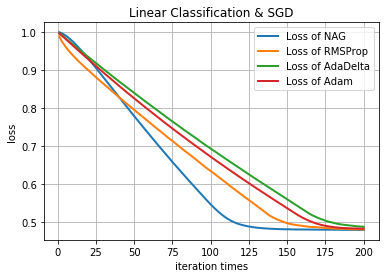

In [6]:
# coding=utf-8
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_svmlight_file
import random

def loadDataSet():
    # 读取数据
    train_data = load_svmlight_file('a9a.txt')
    X_train = np.reshape(train_data[0].todense().data, (train_data[0].shape[0], train_data[0].shape[1]))
    y_train = np.reshape(train_data[1].data, (train_data[1].shape[0], 1))

    validation_data = load_svmlight_file('a9a.t')
    zeros = np.zeros(validation_data[0].shape[0])
    X_validation = np.reshape(validation_data[0].todense().data, (validation_data[0].shape[0], validation_data[0].shape[1]))
    X_validation = np.column_stack((X_validation, zeros))
    y_validation = np.reshape(validation_data[1].data, (validation_data[1].shape[0], 1))

    print(X_train.shape,y_train.shape)
    print(X_validation.shape,y_validation.shape)
    return X_train, X_validation, y_train, y_validation

def loss_function(X_data, y_data, w, C):
    hinge_loss = 0
    losses = (1 - y_data * np.dot(X_data, w))
    for one_loss in losses:
        hinge_loss += C * max(0, one_loss)
    return hinge_loss / len(X_data)


def compute_gradient(X_data, y_data, w, C):
    gradient = np.zeros((1, X_data.shape[1]))
    losses = (1 - y_data * np.dot(X_data, w))
    for i, loss in enumerate(losses):
        if loss <= 0:
            gradient += w.T
        else:
            gradient += w.T - C * y_data[i] * X_data[i]
    return gradient / len(X_data)


def NAG(w, gradient, v, mu=0.9, eta=0.0003):
    v_prev = v
    v = mu * v + eta * gradient
    w += ( mu * v_prev - (1 + mu) * v).reshape((123, 1))
    return w, v

def RMSProp(w, gradient, cache, decay_rate=0.9, eps=1e-8, eta=0.0005):
    cache = decay_rate * cache + (1 - decay_rate) * (gradient ** 2)
    w += (- eta * gradient / (np.sqrt(cache + eps))).reshape((123, 1))
    return w, cache

def AdaDelta(w, gradient, cache, delta_t, r=0.95, eps=1e-8):
    cache = r * cache + (1 - r) * (gradient ** 2)
    delta_theta = - np.sqrt(delta_t + eps) / np.sqrt(cache + eps) * gradient
    w = w + delta_theta.reshape((123, 1))
    delta_t = r * delta_t + (1 - r) * (delta_theta ** 2)
    return w, cache, delta_t

def Adam(w, gradient, m, i, t, beta1=0.9, beta2=0.999, eta=0.0005, eps=1e-8):
    m = beta1 * m + (1 - beta1) * gradient
    mt = m / (1 - beta1 ** i)
    t = beta2 * t + (1 - beta2) * (gradient ** 2)
    vt = t / (1 - beta2 ** i)
    w += (-eta * mt / (np.sqrt(vt + eps))).reshape((123, 1))
    return w, m, t

def plotLossPerTime(epoch, nag_losses, rms_losses, adad_losses, adam_losses):
    plt.xlabel('iteration times')
    plt.ylabel('loss')
    plt.title('Linear Classification & SGD')
    n_cycles = range(1,epoch+1)
    plt.plot(n_cycles, nag_losses, label="Loss of NAG", linewidth=2)
    plt.plot(n_cycles, rms_losses, label="Loss of RMSProp", linewidth=2)
    plt.plot(n_cycles, adad_losses, label="Loss of AdaDelta", linewidth=2)
    plt.plot(n_cycles, adam_losses, label="Loss of Adam", linewidth=2)
    plt.legend(loc=0)
    plt.grid()
    plt.show()

X_train, X_validation, y_train, y_validation = loadDataSet()
nag_w = np.zeros((X_train.shape[1], 1))
rms_w = np.zeros((X_train.shape[1], 1))
adad_w = np.zeros((X_train.shape[1], 1))
adam_w = np.zeros((X_train.shape[1], 1))

v = np.zeros(X_train.shape[1])
cache = np.zeros(X_train.shape[1])
adad_cache = np.zeros(X_train.shape[1])
delta_t = np.zeros(X_train.shape[1])
m = np.zeros(X_train.shape[1])
t = np.zeros(X_train.shape[1])

batch_size = 5000
epoch = 200
C = 1
nag_losses = []
rms_losses = []
adad_losses = []
adam_losses = []

for i in range(epoch):
    index = list(range(len(X_train)))
    random.shuffle(index)

    # NAG
    nag_gradient = compute_gradient(X_train[index][:batch_size], y_train[index][:batch_size], nag_w, C)
    nag_w, v = NAG(nag_w, nag_gradient, v)
    nag_loss = loss_function(X_validation, y_validation, nag_w, C)
    nag_losses.append(nag_loss)
    print("NAG_loss = %f" % nag_loss)

    # RMSProp
    rms_gradient = compute_gradient(X_train[index][:batch_size], y_train[index][:batch_size], rms_w, C)
    rms_w, cache = RMSProp(rms_w, rms_gradient, cache)
    rms_loss = loss_function(X_validation, y_validation, rms_w, C)
    rms_losses.append(rms_loss)
    print("RMSProp_loss = %f" % rms_loss)

    # AdaDelta
    adad_gradient = compute_gradient(X_train[index][:batch_size], y_train[index][:batch_size], adad_w, C)
    adad_w, adad_cache, delta_t = AdaDelta(adad_w, adad_gradient, adad_cache, delta_t)
    adad_loss = loss_function(X_validation, y_validation, adad_w, C)
    adad_losses.append(adad_loss)
    print("AdaDelta_loss = %f" % adad_loss)

    # Adam
    adam_gradient = compute_gradient(X_train[index][:batch_size], y_train[index][:batch_size], adam_w, C)
    adam_w, m, t = Adam(adam_w, adam_gradient, m, i+1, t)
    adam_loss = loss_function(X_validation, y_validation, adam_w, C)
    adam_losses.append(adam_loss)
    print("Adam_loss = %f" % adam_loss)

    print("--------------------------------")

plotLossPerTime(epoch, nag_losses, rms_losses, adad_losses, adam_losses)